<a href="https://colab.research.google.com/github/ayush-thakur02/SDXL-Turbo/blob/main/SDXL_Turbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="justify" markdown=1>

# SDXL Turbo Colab Notebook || Github - @ayush-thakur02

This Python Notebook is designed for running the SDXL Turbo models on Google Colab with a T4 GPU. These open-source models are entirely free for you to use as much as you'd like, enabling you to synthesize high-resolution images with few-step inference. Don't forget to share this resource with your friends, and happy synthesizing! 😃

---

### Make Sure to follow me:

[![Github](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/ayush-thakur02/SDXL-Turbo)
[![BioLink](https://img.shields.io/badge/bio.link-000000%7D?style=for-the-badge&logo=biolink&logoColor=white)](https://bio.link/ayush_thakur02)

</div>

## Install and Setup Requirements

In [1]:
!pip install diffusers transformers accelerate --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 20.8 MB/s eta 0:00:00


In [2]:
from diffusers import AutoPipelineForText2Image
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Image Generation

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 701 ms, sys: 0 ns, total: 701 ms
Wall time: 708 ms


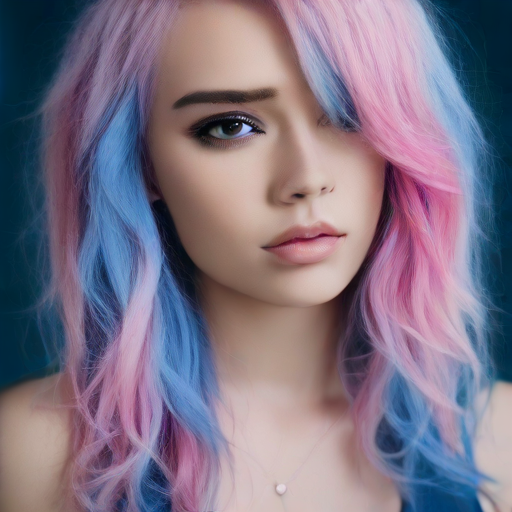

In [9]:
%%time
# @title Text - 2 - Image { vertical-output: true, display-mode: "form" }
prompt = "close portrait of a beautiful girl, blue, pink hair style" # @param {type:"string"}
guidance_scale = 0.1 # @param {type:"slider", min:0, max:2, step:0.1}
num_inference_steps = 1 # @param {type:"slider", min:0, max:25, step:1}
image = pipe(prompt=prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
image

In [ ]:
%%time
# @title Image - 2 - Image { vertical-output: true, display-mode: "form" }
image_location = "" # @param {type:"string"}
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k" # @param {type:"string"}
guidance_scale = 0.0 # @param {type:"slider", min:0, max:2, step:0.1}
num_inference_steps = 2 # @param {type:"slider", min:0, max:25, step:1}
strength = 0.5 # @param {type:"slider", min:0, max:1, step:0.1}
resize_width = 512 # @param {type:"integer"}
resize_heigth = 512 # @param {type:"integer"}

init_image = load_image(image_location).resize((width, heigth))

image = pipe(prompt, image=init_image, num_inference_steps=num_inference_steps, strength=strength, guidance_scale=guidance_scale).images[0]
image

<div align="justify" markdown=1>

# Support me

Hey Guys, I am a student who is passionate about AI and it's generative models. I created this notebook to share my work and help others learn and experiment with the SDXL Turbo models. If you find this notebook useful or interesting, please consider supporting me in any of the following ways:

 - Star this repository on GitHub and share it with your friends and colleagues.
 - Follow me on GitHub and Twitter for more updates and projects.
 - Buy me a coffee

[!["Buy Me A Coffee"](https://www.buymeacoffee.com/assets/img/custom_images/orange_img.png)](https://www.buymeacoffee.com/ayushthakur)
[![Github](https://img.shields.io/badge/GitHub_Repository-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/ayush-thakur02/SDXL-Turbo)

Thank you for your support and feedback! 😊

</div>